# Estimating the number of clusters with Mean Shift Algorithm

__Mean Shift__ is a powerful algorithm used in _unsupervised_ algorithm. It is a non-parametric algorithm used frequently for clustering. It is non-parametric because it does not make any assumptions about the underlying distributions. This is in contrast to parameteric techniques, where we assume that the underlying data follows a standard probability distribution. Mean Shift finds a lot of application in fields like object tracking and real-time data analysis.

In the Mean Shift algorithm, we consider the whole feature space as a probability density function. We start with the training dataset and assume that they have been sampled from a probability density function. In this framework, the clusters correspond to the local maxima of the underlying data distribution and the Mean Shift will identify those peaks. 

The goal of the Mean Shift is to identify the location of centroids. For each data point in the training dataset, it defines a window around it. It then computes the centroid for this window and updates the location to this new centroid. It then repeats the process for this new location by defining a window around it. As we keep doing this, we move closer to the peak of the cluster. Each data point will move towards the cluster it belongs to. The movement is towards a region of higher density.

We keep shifting the centroids, also called means, towards the peaks of each cluster. Since we keep shifting the means, it is called Mean Shift! We keep doing this until the algorithm converges, at which state the centroid doesn't move anymore.

Center of clusters: [[ 2.95568966  1.95775862]
 [ 7.17563636  2.18145455]
 [ 2.17603774  8.03283019]
 [ 5.97960784  8.39078431]
 [ 4.81044444  5.07111111]]
Number of clusters in input data = 5


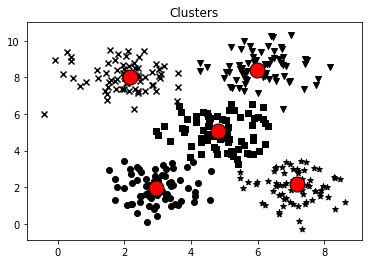

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

# Load the data from input file
input_file = 'data_clustering.txt'
X = np.loadtxt(input_file, delimiter=',')

# Bandwidth is a parameter of the underlying kernel density estimation process used in Mean Shift
# Algorithm. The bandwidth affects the overall convergence rate of the algorithm and the number 
# of clusters we end up with in the end. If the bandwidth is too small, it might results in too
# many clusters. If the value is too large, it will merge distinct clusters.

# Estimate the bandwidth of X
bandwidth_X = estimate_bandwidth(X, quantile=0.1, n_samples=len(X))

# Cluster data with MeanShift
meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)
meanshift_model.fit(X)

# Extract the centers of clusters
cluster_centers = meanshift_model.cluster_centers_
print('Center of clusters: {}'.format(cluster_centers))

# Estimate the number of clusters
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print('Number of clusters in input data = {}'.format(num_clusters))

# Plot the points and cluster center
plt.figure()
markers = 'o*xvs'

for i, marker in zip(range(num_clusters), markers):
    # Plot the point that belong to the current cluster
    plt.scatter(X[labels==i, 0], X[labels==i, 1], marker=marker, color='black')
    
    # Plot the cluster center
    cluster_center = cluster_centers[i]
    plt.plot(cluster_center[0], 
             cluster_center[1], 
             marker='o', 
             markerfacecolor='red', 
             markeredgecolor='black', 
             markersize=15)
plt.title('Clusters')
plt.show()